In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm.notebook import trange, tqdm

from matplotlib.ticker import AutoMinorLocator


## VS Code, choisir un seul des 3 :

# Pour affichage interactif (notamment 3D) dans notebook
# %matplotlib widget

# Pour affichage interactif (notamment 3D) hors du notebook
# %matplotlib qt

# Pour affichage simple dans notebook
%config InlineBackend.figure_format = 'png'

t = time.time()

In [2]:
df = pd.read_csv('data/df_train_prepro.csv').sample(frac=1)
df

,day,hashed_partner_id,hashed_campaign_id,contextid,display_env,target_env,rtbtypeid,rtbadvisibility,rtb_detectedlanguage,urlhash2,...,hashed_uid,hashed_xd_id,valueperclick,device_type,is_display_clicked,zonecostineuro,timestamp,hour,weekday,display_size
54188,2020-10-19,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'H\xe5 \x0e}\xa4\xebM\x0b4\x94z\xbd\x12\x13\x...,7,web,1,4.0,0.0,12.0,-2.327217e+08,...,b'\xacII\xc5?\x95\x08\x0c\xd7\xa6\xbc\xe86\xeb...,b'\xacII\xc5?\x95\x08\x0c\xd7\xa6\xbc\xe86\xeb...,0.400762,Desktop,0,0.175000,2020-10-19 15:02:10,15,Monday,0
1146020,2020-10-18,b'F\xb7$\xb2\xf8]O{\xd4\x85B:\x04\xbc\xf2\xcf\...,b'\xa4n\x93w\xbd\x1b(\x0b\x8a\xd1\x9ccB~PGE{\x...,8,web,1,73.0,0.0,127.0,-9.352256e+08,...,"b""\x84id\x00\x16\xb3\xa3\xe9\xb6\x8d\xcaS'(\xc...","b'\x07\xa7u\x08Z\xf6\xc2,C\x18\xc3\xf1\xee\xd1...",0.194197,Android,0,0.348449,2020-10-18 15:15:20,15,Sunday,75000
1570909,2020-10-13,b'F\xb7$\xb2\xf8]O{\xd4\x85B:\x04\xbc\xf2\xcf\...,b'J-=\xee!\xd0m\xf3\xdb\xffo=a\xc8B\x0e\xbb\x1...,6,web,1,73.0,0.0,127.0,-1.091776e+09,...,"b'!E\x0c\x94,e3\x0f\x0e3_\x80\x13\xeb\xdaN\xbc...","b'!E\x0c\x94,e3\x0f\x0e3_\x80\x13\xeb\xdaN\xbc...",0.056452,Android,0,0.440001,2020-10-13 14:06:00,14,Tuesday,75000
38656,2020-10-19,b'5IH\xefa\xd1\x01I\xfa\x91\xad\x1b\xf6\xa8go\...,b'\\_F\xe1L/\xf6:\xea\xac\x03\x01\xf5\x98\x87\...,1,app_android,1,73.0,1.0,12.0,-1.492244e+09,...,"b'\x88v\xc3\x19""\xdf-m}\xa4\xceV\x14\x19\\e\x0...","b""\x10\xb7\xf81\x7fq\xab\xf7\xf5\xc6\xfcZ\xac\...",0.128658,Android,0,1.675976,2020-10-19 15:51:10,15,Monday,0
41586,2020-10-19,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,"b""f|g\xd5T\xc8\xe2\x90\xc6\xc8\xfeL\x0c\x15\xe...",1,web,1,4.0,2.0,12.0,-3.277943e+08,...,b'<\xcb%-#`\xb8\xa3\x7fQ\t\xd0\xe26\x90Y\xfdT\...,b'\xe2\xdb\xe4\x03\xa6\x04^\x9a\xdc\x82\x9a\xe...,0.529218,Android,0,0.460000,2020-10-19 19:46:40,19,Monday,94080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390444,2020-10-18,b'\x0f\xbc\x909\x14[dI\xa7v]\xcc\x00\xd3\xbd\x...,b'}.#\x91\x95\xb2\xca;\xdbB:\xc1^\x16\x8dL\x07...,5,web,1,4.0,2.0,16.0,1.048619e+09,...,b'\x9c\x17\r\xc5\xdcpkL\x12\x86\x8f\x92\xc1rw\...,b'\x9c\x17\r\xc5\xdcpkL\x12\x86\x8f\x92\xc1rw\...,0.218307,Android,0,0.270000,2020-10-18 07:29:40,7,Sunday,94080
216520,2020-10-18,b'F\xb7$\xb2\xf8]O{\xd4\x85B:\x04\xbc\xf2\xcf\...,b'G\xea\xberB\xda\x889}\x8a\xb1\x9b\xaf*6~kkcA...,9,web,1,83.0,0.0,127.0,-8.550085e+08,...,b'\xd0\xdf\x03= \xf4\x0b\x9a\x95*D\xf3C\xcf+s\...,"b""\x1d\xd6\xb8\x86\xc4bYu;F\x05\x88r'\xf0A\xe4...",0.119675,Unknown,0,0.050059,2020-10-18 19:11:40,19,Sunday,75000
1563237,2020-10-13,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'7\xa0%5\x98\x02\x00\xe5\xa2\xfb\xd6\xa9^\xb7...,4,app_android,1,4.0,1.0,12.0,1.384186e+09,...,b'$+l\xec\xccF\xa8\x84\xfd`\x92(\xef9\x03\x94O...,b'$+l\xec\xccF\xa8\x84\xfd`\x92(\xef9\x03\x94O...,0.274808,Android,1,6.564000,2020-10-13 17:09:50,17,Tuesday,1024000
874236,2020-10-17,b'\x0f\xbc\x909\x14[dI\xa7v]\xcc\x00\xd3\xbd\x...,b'*&e\x083\x99\xeezI<\x98\xbaz\x96\xeaF\xea\xa...,8,web,1,29.0,0.0,127.0,-4.492859e+08,...,"b'\x05\xbc""\x08p;\xe3B\x08We\xc03\x87\x98Fp\xc...","b'\x05\xbc""\x08p;\xe3B\x08We\xc03\x87\x98Fp\xc...",0.085687,Desktop,0,3.564712,2020-10-17 22:54:50,22,Saturday,0


In [3]:
df.dtypes

day                                                object
hashed_partner_id                                  object
hashed_campaign_id                                 object
contextid                                           int64
display_env                                        object
target_env                                          int64
rtbtypeid                                         float64
rtbadvisibility                                   float64
rtb_detectedlanguage                              float64
urlhash2                                          float64
urlhash3                                          float64
urlhash4                                          float64
user_country                                       object
hashed_affiliateid                                 object
hashed_app_id                                      object
googleviewability                                 float64
googlepagevertical                                float64
campaignscenar

# Corrélations

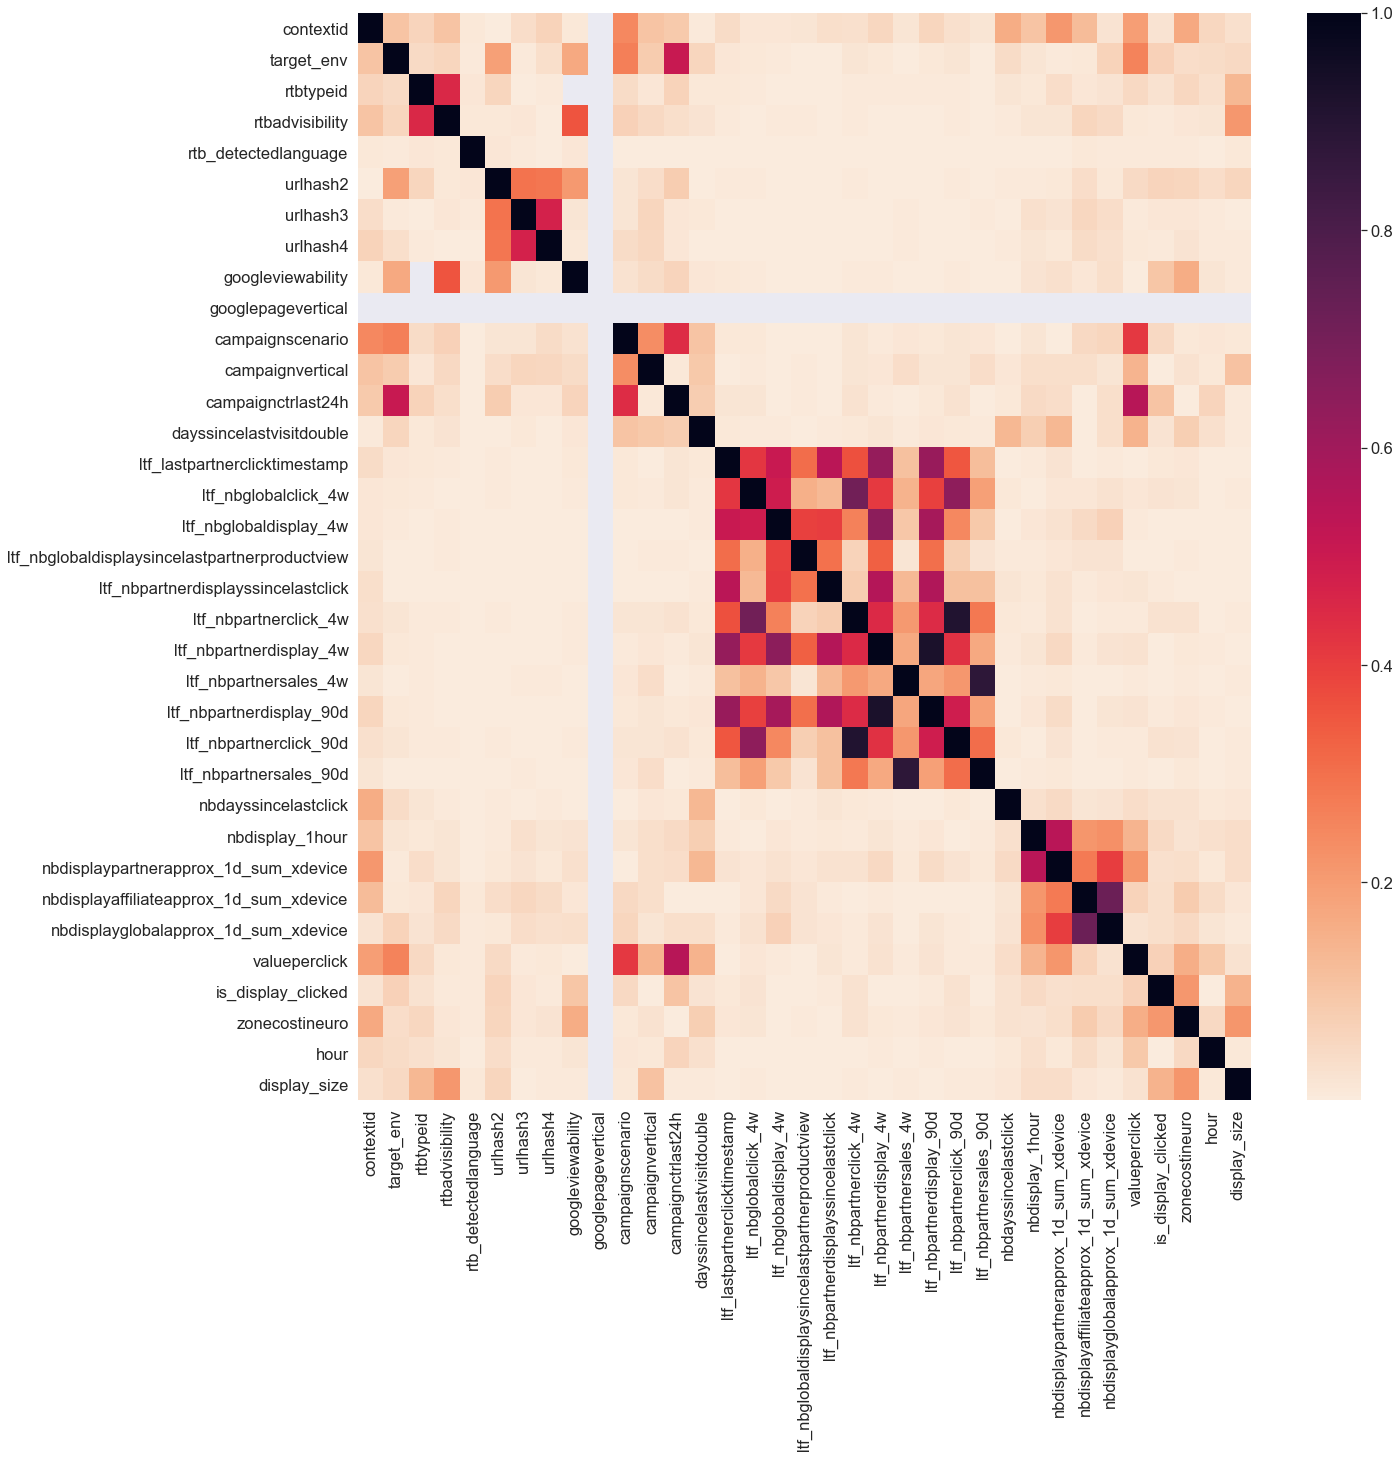

In [4]:
fig = plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
corrMatrix = df.corr()
corrMatrix = np.abs(corrMatrix)
sns.heatmap(corrMatrix, cmap="rocket_r", annot=False)
plt.show()

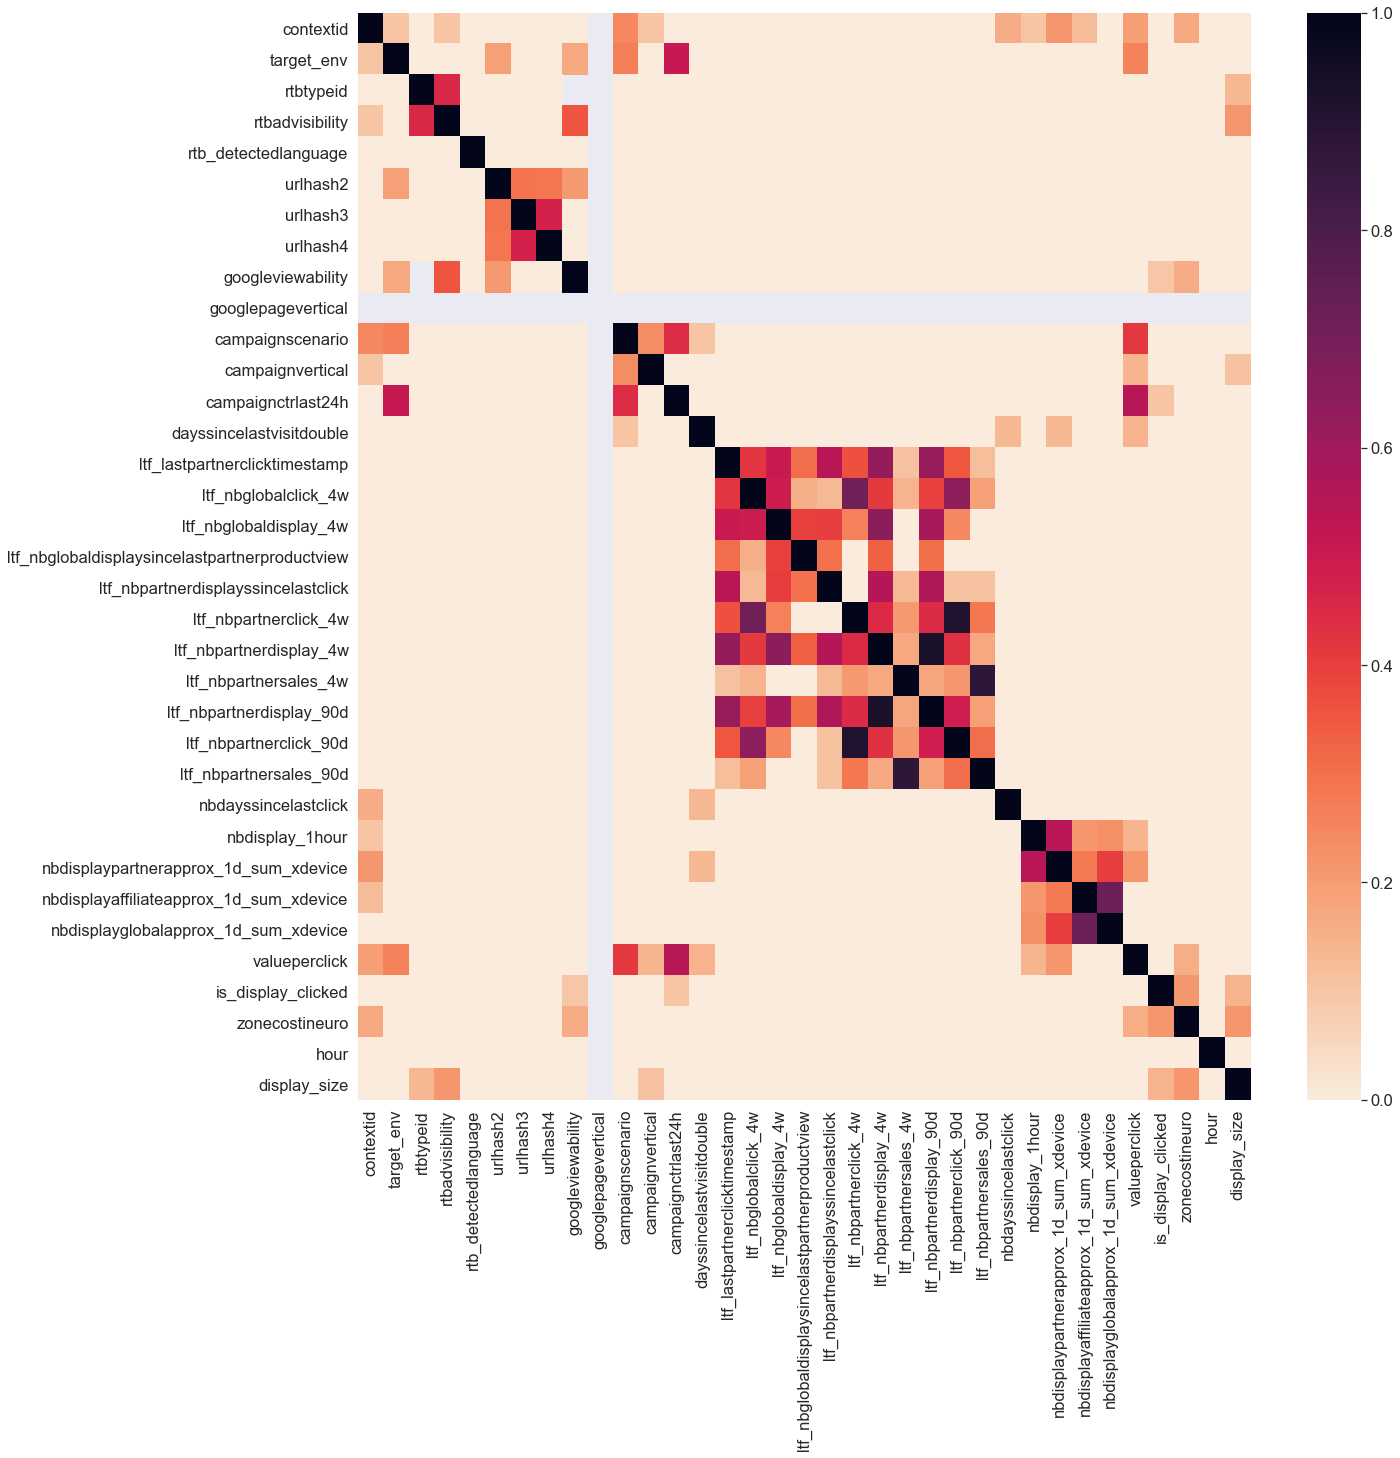

In [5]:
fig = plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
corrMatrix = corrMatrix.applymap(lambda x : 0 if x <= 0.1 else x)
sns.heatmap(corrMatrix, cmap="rocket_r", annot=False)
plt.show()

# Pourcentages de clics selon les modalités de plusieurs variables explicatives

In [6]:
def to_discrete(serie, n=10, moyenne=True):
    """
    Renvoie un objet Series contenant une version discrète de la variable
    numérique 'variable' dans le data frame df.
    Cette variable discrète est constituée de dix catégories croissantes.
    """
    discrete_var = np.zeros(len(serie))
    var_min = serie.min()
    var_max = serie.max()
    pas = (var_max - var_min)/n
    for i in trange(len(serie)):
        j = -1
        while serie.iloc[i] >= var_min + (j+1)*pas:
            j += 1
        if j == n:
            j = n-1
        discrete_var[i] = var_min + (j+0.5)*pas if moyenne else j
    return discrete_var

In [7]:
def ratio_plot(variable, zoom=False):
    """
    Trace la proportion de clics selon la variable 'variable' dans df.
    """
    clicked = df[df['is_display_clicked'] == 1].groupby(variable).count()['is_display_clicked']
    notclicked = df[df['is_display_clicked'] == 0].groupby(variable).count()['is_display_clicked']
    ratio = clicked / (clicked + notclicked)
    
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(8, 6))
    ratio.plot(ax=ax, marker='o')
    plt.xticks(rotation=0)
    
    if not zoom:
        y_min, y_max = ax.get_ylim()
        y_min = 0
        ax.set_ylim(y_min, y_max)
    
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.grid(which='major')
    ax.grid(b=True, which='minor', axis='y', linestyle='--', alpha=0.2)
    
    ax.set_title(f"Proportion de clics en fonction de {variable}")
    ax.set_xlabel(f"{variable}")
    ax.set_ylabel('Nb de clics/ (nb de clics + nb de non clics)') 

    plt.show()
    plt.style.use('default')

In [8]:
def ratios_plot(variables):
    """
    Trace sur un même graphique les proportion de clics selon les variables de
    la liste 'variables' dans df.
    """
    ratios = []
    mini = float('inf')
    maxi = - float('inf')
    for variable in variables:
        clicked = df[df['is_display_clicked'] == 1].groupby(variable).count()['is_display_clicked']
        notclicked = df[df['is_display_clicked'] == 0].groupby(variable).count()['is_display_clicked']
        ratio = clicked / (clicked + notclicked)
        m, M = ratio.min(), ratio.max()
        if m < mini:
            mini = m
        if M > maxi:
            maxi = M
        ratios.append(ratio)
    
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.xticks(rotation=0)
    
    ax.set_ylim(mini - 0.05*(maxi-mini), maxi + 0.05*(maxi-mini))
    
    for i, ratio in enumerate(ratios):
        ratio.plot(ax=ax, label=variables[i], legend=True)
    
    ax.grid(which='major')
    ax.grid(b=True, which='minor', axis='y', linestyle='--', alpha=0.2)
    
    ax.set_title("Proportion de clics en fonction des variables")
    ax.set_xlabel("Modalités croissantes des variables")
    ax.set_ylabel('Nb de clics/ (nb de clics + nb de non clics)') 

    plt.show()

In [9]:
def stacked_barplot(column):
    clicked = df[df['is_display_clicked'] == 1].groupby(column).count()['is_display_clicked']
    notclicked = df[df['is_display_clicked'] == 0].groupby(column).count()['is_display_clicked']
    total = df.groupby('contextid').count()['is_display_clicked']
    clicked = clicked / total * 100
    notclicked = notclicked / total * 100

    r = list(range(len(clicked)))

    # plot
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(8, 6))
    barWidth = 0.85
    names = clicked.index
    # Create orange Bars
    ax.bar(r, list(notclicked), color='#f9bc86', edgecolor='white', width=barWidth, label="no click")
    # # Create blue Bars
    ax.bar(r, list(clicked), bottom=list(notclicked), color='#a3acff',
        edgecolor='white', width=barWidth, label='click')
    
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.grid(which='major', axis='y')
    ax.grid(b=True, which='minor', axis='y', linestyle='--', alpha=0.2)

    plt.legend()
    # Custom x axis
    plt.xticks(r, names)
    plt.xlabel(column)
    plt.ylabel('Répartition des clics')

    # Show graphic
    plt.show()
    plt.style.use('default')

In [10]:
# ratio_plot("contextid")

In [11]:
# stacked_barplot('contextid')

In [12]:
# %%time
# df["campaignctrlast24h_d"] = to_discrete(df["campaignctrlast24h"], moyenne=False)
# ratio_plot("campaignctrlast24h_d")

In [13]:
# df["ltf_lastpartnerclicktimestamp_d"] = to_discrete(df["ltf_lastpartnerclicktimestamp"], moyenne=False)
# ratio_plot("ltf_lastpartnerclicktimestamp_d")

In [14]:
# df["ltf_nbpartnersales_4w_d"] = to_discrete(df["ltf_nbpartnersales_4w"], moyenne=False)
# ratio_plot("ltf_nbpartnersales_4w_d")

In [15]:
# df["display_size_discrete"] = to_discrete(df["display_size"], moyenne=False)
# ratio_plot("display_size_discrete")

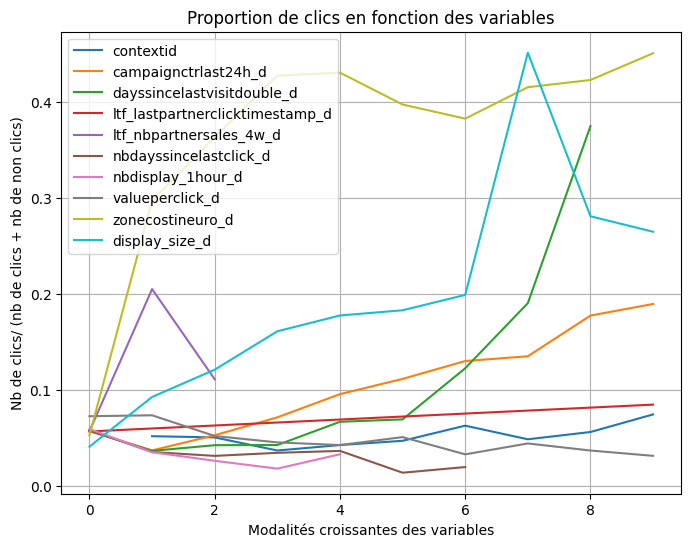

CPU times: user 4min 56s, sys: 9.89 s, total: 5min 6s
Wall time: 5min 4s


In [16]:
%%time

df["campaignctrlast24h_d"] = to_discrete(df["campaignctrlast24h"], moyenne=False)
df['dayssincelastvisitdouble_d'] = to_discrete(df["dayssincelastvisitdouble"], moyenne=False)
df["ltf_lastpartnerclicktimestamp_d"] = to_discrete(df["ltf_lastpartnerclicktimestamp"], moyenne=False)
df["ltf_nbpartnersales_4w_d"] = to_discrete(df["ltf_nbpartnersales_4w"], moyenne=False)
df["nbdayssincelastclick_d"] = to_discrete(df["nbdayssincelastclick"], moyenne=False)
df["nbdisplay_1hour_d"] = to_discrete(df["nbdisplay_1hour"], moyenne=False)
df["valueperclick_d"] = to_discrete(df["valueperclick"], moyenne=False)
df["zonecostineuro_d"] = to_discrete(df["zonecostineuro"], moyenne=False)
df["display_size_d"] = to_discrete(df["display_size"], moyenne=False)

ratios_plot(['contextid', 'campaignctrlast24h_d', 'dayssincelastvisitdouble_d', 'ltf_lastpartnerclicktimestamp_d', 'ltf_nbpartnersales_4w_d', 'nbdayssincelastclick_d', 'nbdisplay_1hour_d', 'valueperclick_d', 'zonecostineuro_d', 'display_size_d'])

In [17]:
d = df[['is_display_clicked', 'hashed_uid', 'contextid']].groupby(['hashed_uid']).sum()
d.sort_values('is_display_clicked', ascending=False, inplace=True)
d['user_apperances'] = df['hashed_uid'].value_counts()
d['contextid_weighted'] = d['contextid'] / d['user_apperances']

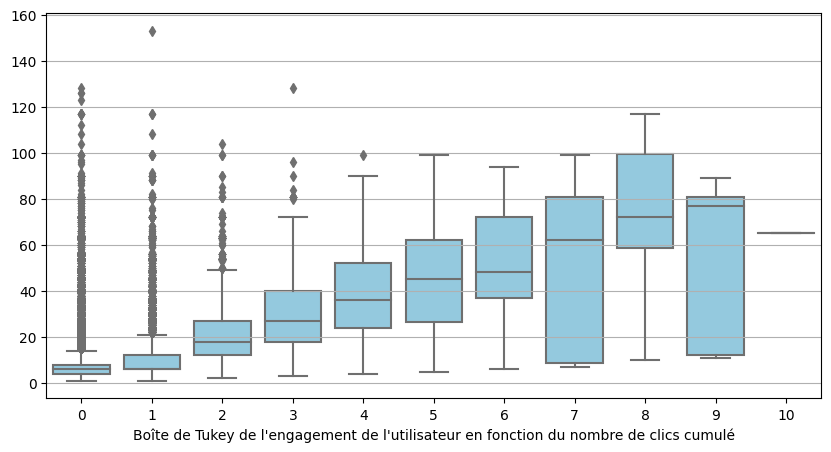

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
plt.style.use('default')
sns.boxplot(x="is_display_clicked", y="contextid", data=d, ax=ax, color="skyblue")
ax.set_xlabel("Boîte de Tukey de l'engagement de l'utilisateur en fonction du nombre de clics cumulé")
ax.set_ylabel('')
ax.grid(axis='y')
plt.show()
plt.style.use('default')

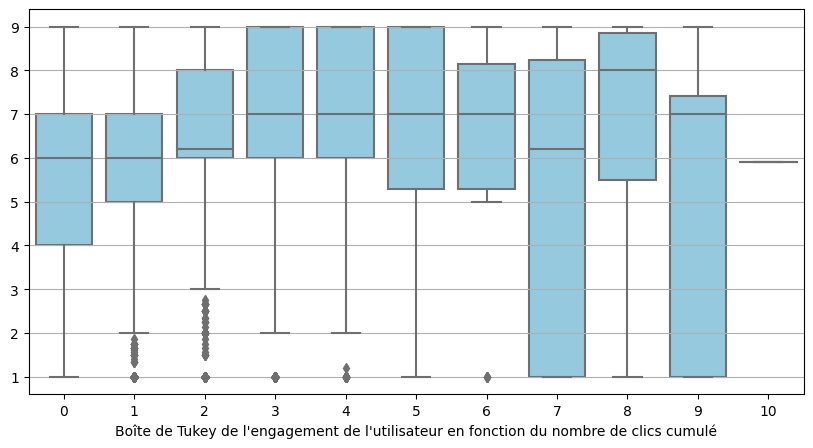

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
plt.style.use('default')
sns.boxplot(x="is_display_clicked", y="contextid_weighted", data=d, ax=ax, color="skyblue")
ax.set_xlabel("Boîte de Tukey de l'engagement de l'utilisateur en fonction du nombre de clics cumulé")
ax.set_ylabel('')
ax.grid(axis='y')
plt.show()
plt.style.use('default')

# Bots

Calcul du nombre de clics par utilisateurs

In [20]:
a = df[['is_display_clicked', 'hashed_uid']].groupby(['hashed_uid']).sum()
a.sort_values('is_display_clicked', ascending=False)

,is_display_clicked
hashed_uid,
b'\x187\xb3\x93\x8cy\xd0MSG?\xd7\xd9\xbav?8$#(-*x\xd1\x1c\xed\x18\xa8\xd8y\x8b\xf1',10
b'#\x0b\xd7*\xa1\xae\x8fLT\xe1[W\x9f\xaf^-1\xfd~\x0f\x0ca\xf7+\x80?)_w\xdd\x9bR',9
b'vp\xd9\xed/\xa1b\xc31\x99FO\x0e\xd9{27\xf1\x8b\x19[`\xba2\xc2\xc8\xb0y\x1f\xb8c\xd0',9
b'\x13\x88\x8d\xd3h\xd9\xa1f\xd3\xea\x1e\x8d\xb7Dn\xa2\x0c>\xea\xf5n\xd3\xb1\xcbJ\x10\x06\x19\xde\x04J\xf9',9
b'>\x90\xdd\x05s\xf2\x8a\x1dv\xc8Kdy\xbc\xd9\xe7a+\xf6\x04G2\xed\x1eT\xe6\xaeS\x81L$\x9c',9
...,...
"b'\x05\xb2R\x0b\xca\xb8c\x9c8\xd9\xbas\x99\xc7j\xf3\xbeEgR\xe4\xfe\xaa\xe6,\x14\xb6\x15 \x1f\xbf\xcf'",0
b'\x05\xb2[\x88\x06\x81!q\xe8<XKL\t\xcb\x04\xbb\xcd\xd9\xab\xb4\xc3UA\xb3UR\xaa~z}\xfa',0
b'\x05\xb2\n\xa3\x95\xb22\xc9\xec\xf8\xc4\rn\xb7\\\x1dx\xc5\x10\x9a_p\x8e6l\xf3Oc!J]H',0


In [21]:
# `hashed_uid` : Hashed identification number of the Web user
d = df[['is_display_clicked', 'hashed_uid', 'contextid']].groupby(['hashed_uid']).sum()
d.sort_values('is_display_clicked', ascending=False, inplace=True)
d['user_apperances'] = df['hashed_uid'].value_counts()
d['contextid_weighted'] = d['contextid'] / d['user_apperances']
d

,is_display_clicked,contextid,user_apperances,contextid_weighted
hashed_uid,,,,
b'\x187\xb3\x93\x8cy\xd0MSG?\xd7\xd9\xbav?8$#(-*x\xd1\x1c\xed\x18\xa8\xd8y\x8b\xf1',10,65,11,5.909091
b'#\x0b\xd7*\xa1\xae\x8fLT\xe1[W\x9f\xaf^-1\xfd~\x0f\x0ca\xf7+\x80?)_w\xdd\x9bR',9,77,11,7.000000
b'vp\xd9\xed/\xa1b\xc31\x99FO\x0e\xd9{27\xf1\x8b\x19[`\xba2\xc2\xc8\xb0y\x1f\xb8c\xd0',9,81,9,9.000000
b'\x13\x88\x8d\xd3h\xd9\xa1f\xd3\xea\x1e\x8d\xb7Dn\xa2\x0c>\xea\xf5n\xd3\xb1\xcbJ\x10\x06\x19\xde\x04J\xf9',9,11,11,1.000000
b'>\x90\xdd\x05s\xf2\x8a\x1dv\xc8Kdy\xbc\xd9\xe7a+\xf6\x04G2\xed\x1eT\xe6\xaeS\x81L$\x9c',9,12,12,1.000000
...,...,...,...,...
"b'\x05\xb2R\x0b\xca\xb8c\x9c8\xd9\xbas\x99\xc7j\xf3\xbeEgR\xe4\xfe\xaa\xe6,\x14\xb6\x15 \x1f\xbf\xcf'",0,8,1,8.000000
b'\x05\xb2[\x88\x06\x81!q\xe8<XKL\t\xcb\x04\xbb\xcd\xd9\xab\xb4\xc3UA\xb3UR\xaa~z}\xfa',0,8,1,8.000000
b'\x05\xb2\n\xa3\x95\xb22\xc9\xec\xf8\xc4\rn\xb7\\\x1dx\xc5\x10\x9a_p\x8e6l\xf3Oc!J]H',0,16,2,8.000000


In [22]:
# `hashed_xd_id` : Hashed cross device identification number 
b = df[['is_display_clicked', 'hashed_xd_id']].groupby(['hashed_xd_id']).sum()
b.sort_values('is_display_clicked', ascending=False)

,is_display_clicked
hashed_xd_id,
b'\x97\x9d)\xb3*\x8e\xf6\xeer\xf7\x166a\x12\xcc\xa5\xf4\x90\xc9\xd9\x197\xd1\xdf\x17f\x10%\xfe\x99\xe4\xb1',10
"b""L\xf5H\x97\x10\xfd\x7f~\x1a9\xa3?\xac\xfdNf\xf6\\\x8f13\xc1\xcc\xf8\xbf\xc9q\x87'\xbc]H""",10
b'\xc4\xc8\xb7\xb0\x7faU\x01D5\xfe\x96\xb7\x165\xff\x90\xc2\xcd;\xbf^\\\x10\xf9z*\x0e\xc6%4v',9
b'\xadk\x10\x99k\\\x7f\xef\xf3\x86\xe6f\\{)\xd8\x14t\x8b\x8b\x16\x7f\xb0z)\xd4\n\xe7&dN\xe9',9
b'>\x90\xdd\x05s\xf2\x8a\x1dv\xc8Kdy\xbc\xd9\xe7a+\xf6\x04G2\xed\x1eT\xe6\xaeS\x81L$\x9c',9
...,...
b'\x05\xa3\x85\xf7TeZ\x98\xcc&\x15\xdc\xbaY\x85\xe8\xf3\xce\xd2I\xc8R:;-\x1f\xb9\xb9\x9e\xef\x89\x95',0
"b'\x05\xa3\x99\xafx4\x96,G\xca\x03I\x97C|\xe7~\xad\x1d\x80M\x96[\xf0\xbd\x886\x96\x1c\xb8\x9c\xa9'",0
b'\x05\xa3\xaa?\xa0W\xf5\xc2\xf4\xcev~X\xe6\xfc\xb3%\xc8?;T\xff\xc1\x02\xf5\\k\xcb2N[\n',0


## Répartition du nombre de clics

Text(0.5, 1.0, 'hashed_uid')

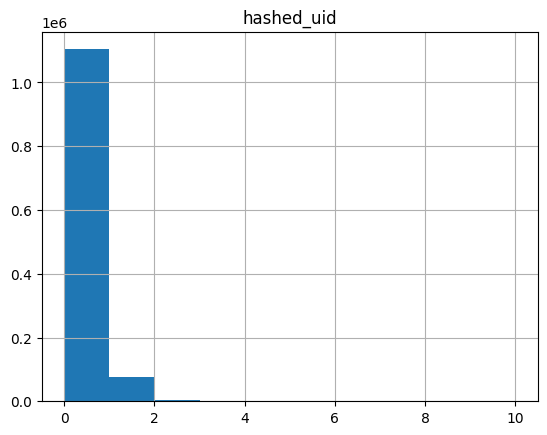

In [23]:
a[(a.is_display_clicked < 20)].hist()
plt.title("hashed_uid")

Text(0.5, 1.0, 'hashed_uid')

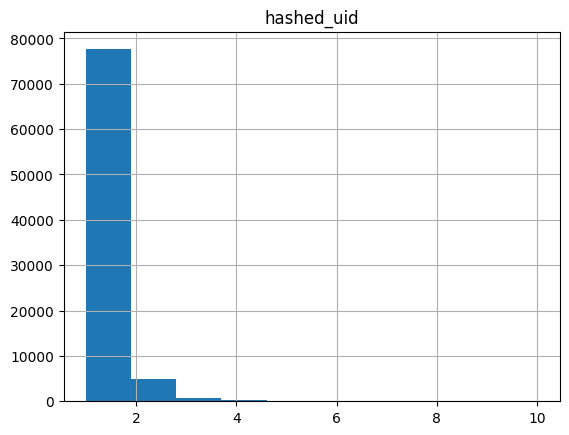

In [24]:
a[(a.is_display_clicked > 0) & (a.is_display_clicked < 20)].hist()
plt.title("hashed_uid")

Text(0.5, 1.0, 'hashed_xd_id')

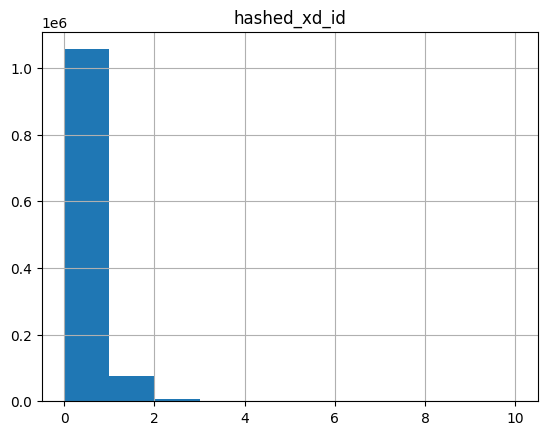

In [25]:
b[(b.is_display_clicked < 20)].hist()
plt.title("hashed_xd_id")

Text(0.5, 1.0, 'hashed_xd_id')

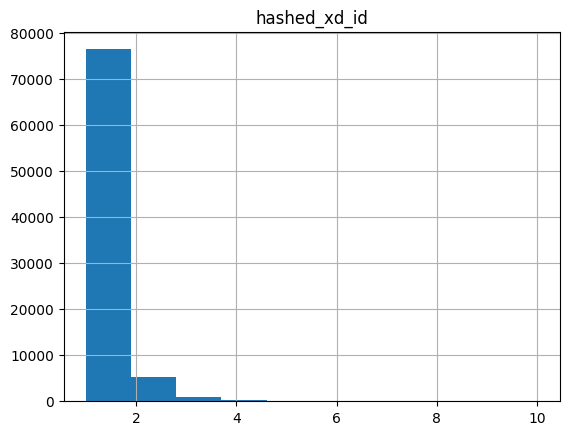

In [26]:
b[(b.is_display_clicked > 0) & (b.is_display_clicked < 20)].hist()
plt.title("hashed_xd_id")

## Valeurs nan dans les clics

Proportion des valeurs nan pour chaque variable parmi les publicités cliquées

In [27]:
c = df.loc[df['is_display_clicked']==1]
c.isnull().sum(axis = 0)/len(c)

day                                               0.000000
hashed_partner_id                                 0.000000
hashed_campaign_id                                0.000000
contextid                                         0.000000
display_env                                       0.000000
target_env                                        0.000000
rtbtypeid                                         0.002975
rtbadvisibility                                   0.002975
rtb_detectedlanguage                              0.002975
urlhash2                                          0.094472
urlhash3                                          0.094472
urlhash4                                          0.094472
user_country                                      0.000174
hashed_affiliateid                                0.000000
hashed_app_id                                     0.324941
googleviewability                                 0.618809
googlepagevertical                                0.0029

## Timestamp

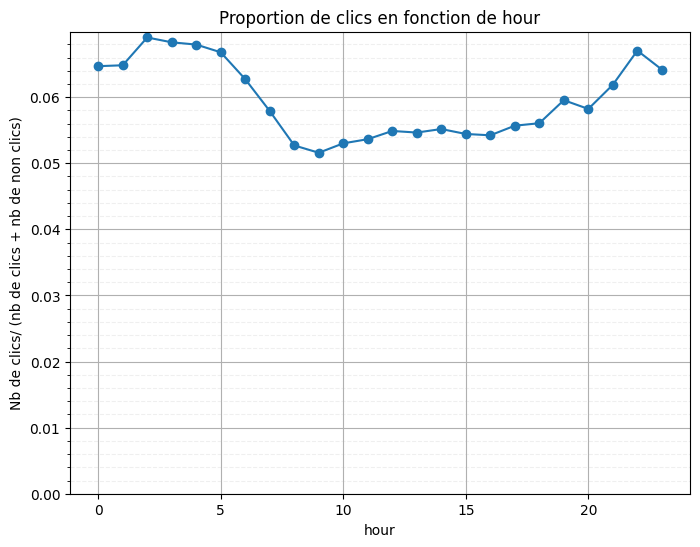

In [28]:
ratio_plot("hour")

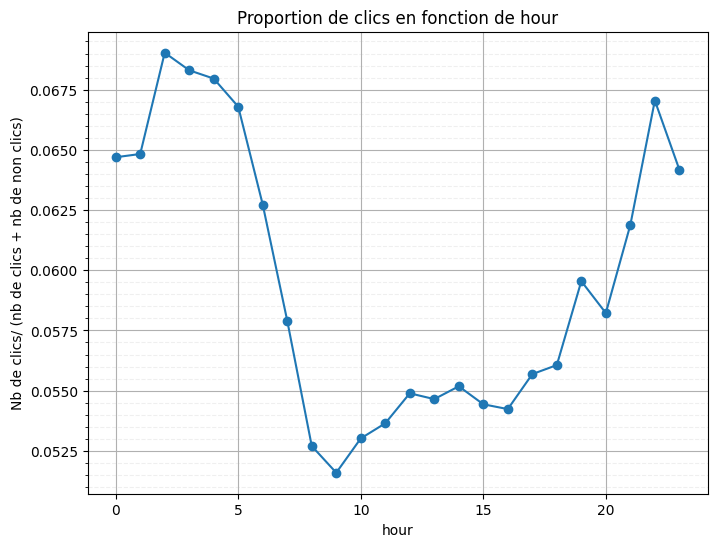

In [29]:
ratio_plot("hour", zoom=True)

In [30]:
df.head()

,day,hashed_partner_id,hashed_campaign_id,contextid,display_env,target_env,rtbtypeid,rtbadvisibility,rtb_detectedlanguage,urlhash2,...,display_size,campaignctrlast24h_d,dayssincelastvisitdouble_d,ltf_lastpartnerclicktimestamp_d,ltf_nbpartnersales_4w_d,nbdayssincelastclick_d,nbdisplay_1hour_d,valueperclick_d,zonecostineuro_d,display_size_d
54188,2020-10-19,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'H\xe5 \x0e}\xa4\xebM\x0b4\x94z\xbd\x12\x13\x...,7,web,1,4.0,0.0,12.0,-2.327217e+08,...,0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
1146020,2020-10-18,b'F\xb7$\xb2\xf8]O{\xd4\x85B:\x04\xbc\xf2\xcf\...,b'\xa4n\x93w\xbd\x1b(\x0b\x8a\xd1\x9ccB~PGE{\x...,8,web,1,73.0,0.0,127.0,-9.352256e+08,...,75000,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1570909,2020-10-13,b'F\xb7$\xb2\xf8]O{\xd4\x85B:\x04\xbc\xf2\xcf\...,b'J-=\xee!\xd0m\xf3\xdb\xffo=a\xc8B\x0e\xbb\x1...,6,web,1,73.0,0.0,127.0,-1.091776e+09,...,75000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38656,2020-10-19,b'5IH\xefa\xd1\x01I\xfa\x91\xad\x1b\xf6\xa8go\...,b'\\_F\xe1L/\xf6:\xea\xac\x03\x01\xf5\x98\x87\...,1,app_android,1,73.0,1.0,12.0,-1.492244e+09,...,0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41586,2020-10-19,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,"b""f|g\xd5T\xc8\xe2\x90\xc6\xc8\xfeL\x0c\x15\xe...",1,web,1,4.0,2.0,12.0,-3.277943e+08,...,94080,1.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0


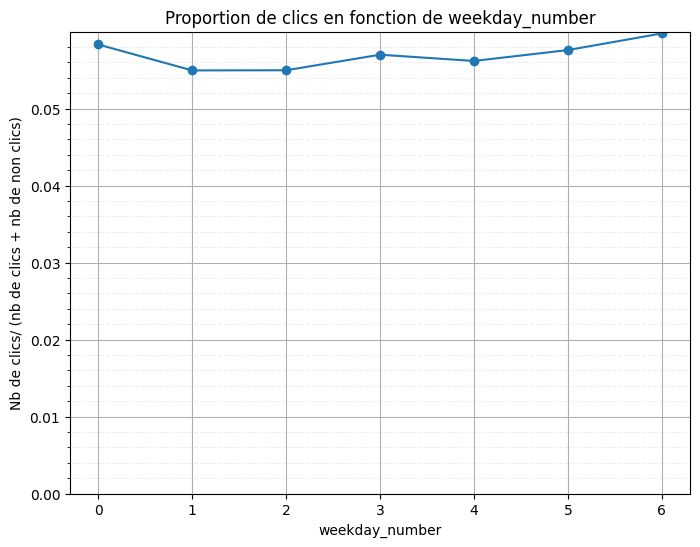

In [31]:
df['weekday_number'] = pd.to_datetime(df.timestamp).dt.weekday
ratio_plot("weekday_number")

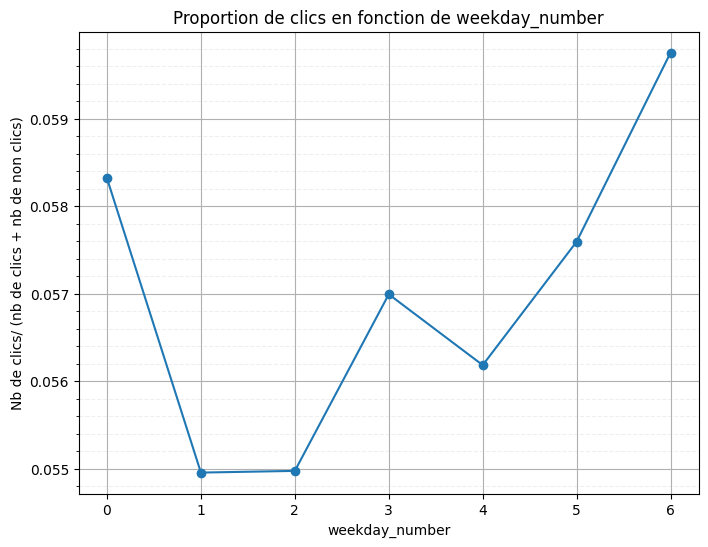

In [32]:
ratio_plot("weekday_number", zoom=True)

In [33]:
print(f"Temps d'exécution total : {time.strftime('%H:%M:%S', time.gmtime(time.time()-t))}")

Temps d'exécution total : 00:06:06
